In [5]:
import os
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sys
sys.path.append("../")

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import anndata
from scipy.stats import spearmanr, pearsonr
import numpy as np
from PIL import Image
import matplotlib

from digitalhistopathology.benchmark.benchmark_clustering import BenchmarkClustering

# Load configuration
with open("../config/config_notebooks_TNBC.json", "r") as config_file:
    config = json.load(config_file)

Image.MAX_IMAGE_PIXELS = None
matplotlib.rcParams["pdf.fonttype"] = 42
matplotlib.rcParams["ps.fonttype"] = 42

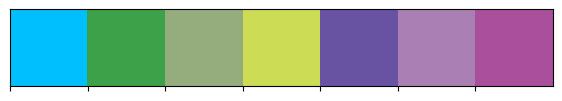

In [6]:
a = config["retrained_color_palette"]
sns.palplot(sns.color_palette(a))

In [7]:
extension='pdf'



In [8]:
# This will give you the results for the FULL models.

model_type = config["retrained_model_list2_type"]
model_list = config["retrained_model_list2"]
benchmark_folder = config["retrained_benchmark_folder2"]
path_to_pipeline=config['path_to_retrained_pipelines_2']


# UNCOMMENT TO GENERATE THE RESULTS FOR THE EXPLORA MODELS
# model_type = config["retrained_model_list1_type"]
# model_list = config["retrained_model_list1"]
# benchmark_folder = config["retrained_benchmark_folder1"]
# path_to_pipeline=config['path_to_retrained_pipelines_1']


pairs_to_compare = [("uni", model) for model in model_list if model != "uni"]

models_palette = dict(zip(model_list, a))
models_palette["handcrafted_features"] = "lightgrey"


In [9]:

saving_folder=os.path.join(benchmark_folder, "unsupervised_clustering_ARI", "kmeans")

benchmark_clustering = BenchmarkClustering(path_to_pipeline=path_to_pipeline,
                                           pipelines_list=model_list,
                                           results_folder="../results",
                                           saving_folder=saving_folder,
                                           dataset=config['dataset'],
                                           extension=extension
                                           )

['uni', 'uni_full_kde_4096_prototypes', 'uni_full_kde_16384_prototypes', 'uni_full_kde_65536_prototypes', 'uni_full_koleo_4096_prototypes', 'uni_full_koleo_16384_prototypes', 'uni_full_koleo_65536_prototypes']
<class 'list'>
Creating folder ../results/benchmark/TNBC/uni_full_models/unsupervised_clustering_ARI/kmeans...
Label files: ['../results/compute_patches/TNBC/spots_labels.csv']


In [10]:
def plot_ari_scores_all_patients(clustering_dict, model_list=None):

    if model_list is None:
        model_list = clustering_dict.keys()

    ari_scores = {}
    for model in model_list:
        ari_scores[model] = {}
        for patient in clustering_dict[model].keys():
            if (patient != 'all') and (patient != 'mean'):
                ari_scores[model][patient] = clustering_dict[model][patient]['ari']
    df_aris = pd.DataFrame.from_dict(ari_scores)
    df_aris_melted = pd.melt(df_aris, var_name='model', value_name='ari')
    df_aris_melted['patient'] = df_aris.index.to_list()*len(df_aris.columns)

    sns.boxplot(data=df_aris_melted, x='model', y='ari', color='white', linewidth=2)
    sns.stripplot(data=df_aris_melted, x='model', y='ari', jitter=True, dodge=True, linewidth=1, hue='patient', palette='Accent')
    plt.xticks(rotation=90)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    sns.despine()
    plt.title('ARI scores for unsupervised clustering', weight='bold')

## Comparison between linear and unlinear clustering

In [13]:
try:
    with open(os.path.join(benchmark_folder, 'unsupervised_clustering_ARI', 'kmeans', 'unsupervised_clustering_results_optk.json')) as f:
        raw_clust = json.load(f)
except:
    raw_clust = benchmark_clustering.unsupervised_clustering_benchmark(n_clusters=None, clustering_name='raw')

try:
    with open(os.path.join(benchmark_folder, 'unsupervised_clustering_ARI', 'kmeans',  'svd5_multiplied_by_S_unsupervised_clustering_results_optk.json')) as f:
        svd_clust = json.load(f)
except:
    svd_clust = benchmark_clustering.unsupervised_clustering_benchmark(n_clusters=None, clustering_name='svd5')
    


umap_clust = benchmark_clustering.get_best_UMAP_ari_per_slide(force_loading=True)


Loading unsupervised clustering results for model uni...
Loading unsupervised clustering results for model uni_full_kde_4096_prototypes...
Loading unsupervised clustering results for model uni_full_kde_16384_prototypes...
Loading unsupervised clustering results for model uni_full_kde_65536_prototypes...
Loading unsupervised clustering results for model uni_full_koleo_4096_prototypes...
Loading unsupervised clustering results for model uni_full_koleo_16384_prototypes...
Loading unsupervised clustering results for model uni_full_kde_4096_prototypes...
Loading unsupervised clustering results for model uni_full_kde_16384_prototypes...
Loading unsupervised clustering results for model uni_full_kde_65536_prototypes...
Loading unsupervised clustering results for model uni_full_koleo_4096_prototypes...
Loading unsupervised clustering results for model uni_full_koleo_16384_prototypes...
Loading unsupervised clustering results for model uni_full_koleo_65536_prototypes...
Loading unsupervised clu

In [14]:
for model in raw_clust.keys():
    print(f"Model: {model}: ari all: {raw_clust[model]['all']['ari']}, ari mean: {raw_clust[model]['mean']['ari']}")

Model: uni: ari all: 0.22945338467221008, ari mean: 0.31822428105308864
Model: uni_full_kde_4096_prototypes: ari all: 0.11262909407791954, ari mean: 0.17297253967727116
Model: uni_full_kde_16384_prototypes: ari all: 0.18862381215547164, ari mean: 0.24684406383082802
Model: uni_full_kde_65536_prototypes: ari all: 0.07310217267798852, ari mean: 0.15675360826001486
Model: uni_full_koleo_4096_prototypes: ari all: 0.19816356980794636, ari mean: 0.27284298542872804
Model: uni_full_koleo_16384_prototypes: ari all: 0.18412598311665737, ari mean: 0.2690704021326992
Model: uni_full_koleo_65536_prototypes: ari all: 0.18731668984369804, ari mean: 0.2748285596706327


In [15]:
for model in raw_clust.keys():
    print(f"Model: {model}: ari tumor: {raw_clust[model]['ARI_tumor']}")

Model: uni: ari tumor: 0.01924608024415077
Model: uni_full_kde_4096_prototypes: ari tumor: 0.017818236747229262
Model: uni_full_kde_16384_prototypes: ari tumor: 0.014256958419669171
Model: uni_full_kde_65536_prototypes: ari tumor: 0.014729938707316695
Model: uni_full_koleo_4096_prototypes: ari tumor: 0.02087492025939001
Model: uni_full_koleo_16384_prototypes: ari tumor: 0.021053701048458495
Model: uni_full_koleo_65536_prototypes: ari tumor: 0.015231339164888202


In [16]:
umap_clust.keys()

dict_keys(['uni', 'uni_full_kde_4096_prototypes', 'uni_full_kde_16384_prototypes', 'uni_full_kde_65536_prototypes', 'uni_full_koleo_4096_prototypes', 'uni_full_koleo_16384_prototypes', 'uni_full_koleo_65536_prototypes'])

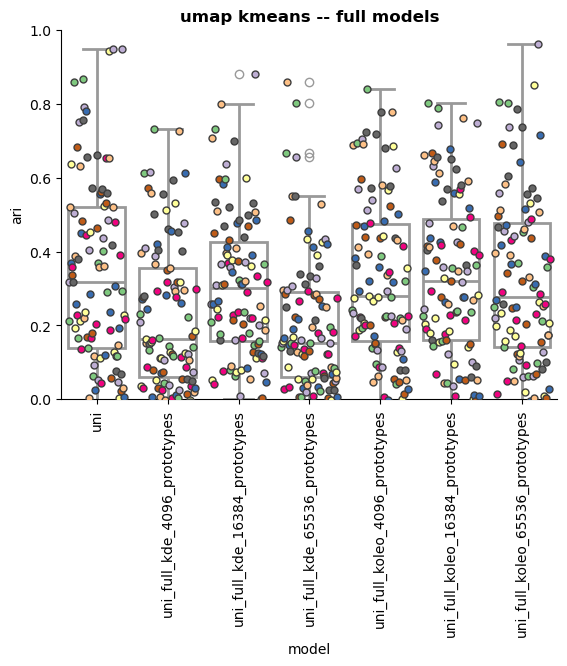

In [17]:
# for clust_dict, clust_name in zip([raw_clust, svd_clust, umap_clust], ["raw", "svd", "umap"]):

plt.figure()
plot_ari_scores_all_patients(umap_clust, model_list=model_list)
plt.ylim(0, 1)
plt.title(f"umap kmeans -- {model_type} models", weight='bold')

if len(umap_clust[model_list[0]].keys()) > 15:
    plt.legend().remove()


In [13]:
# Scatter plot

In [18]:
dfs_clust = []
for clustering_dict, method in zip([raw_clust, svd_clust, umap_clust], ["raw", "svd", "umap"]):
#for clustering_dict, method in zip([umap_clust], ["umap"]):
    ari_scores = {}
    for model in clustering_dict.keys():
        ari_scores[model] = {}
        for patient in clustering_dict[model].keys():
            #if (patient != 'all') and (patient != 'mean'):
            if (patient != 'ARI_tumor'):
                ari_scores[model][patient] = clustering_dict[model][patient]['ari']
    df_aris = pd.DataFrame.from_dict(ari_scores)
    df_aris_melted = pd.melt(df_aris, var_name='model', value_name='ari')
    df_aris_melted['patient'] = df_aris.index.to_list()*len(df_aris.columns)
    df_aris_melted['clustering'] = method
    dfs_clust.append(df_aris_melted)

df_comp = pd.concat(dfs_clust)




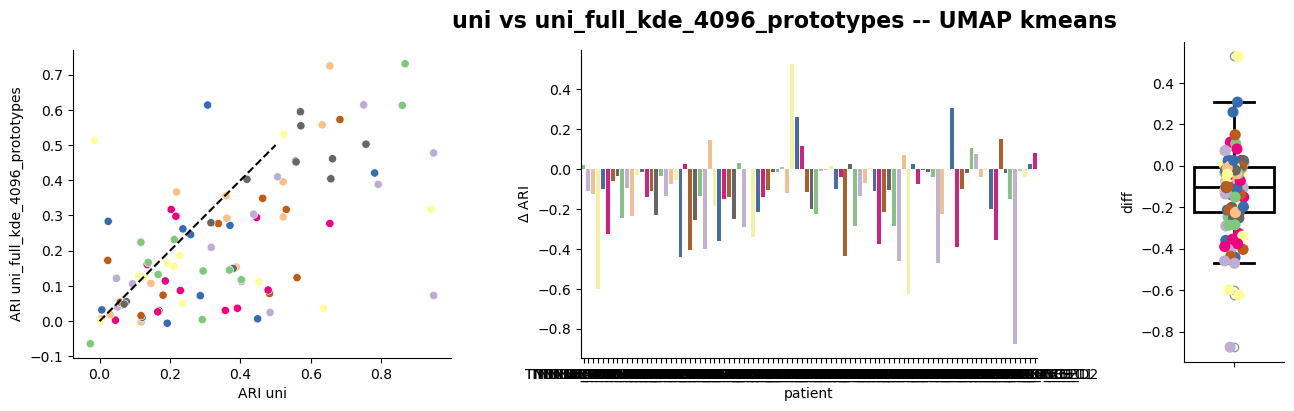

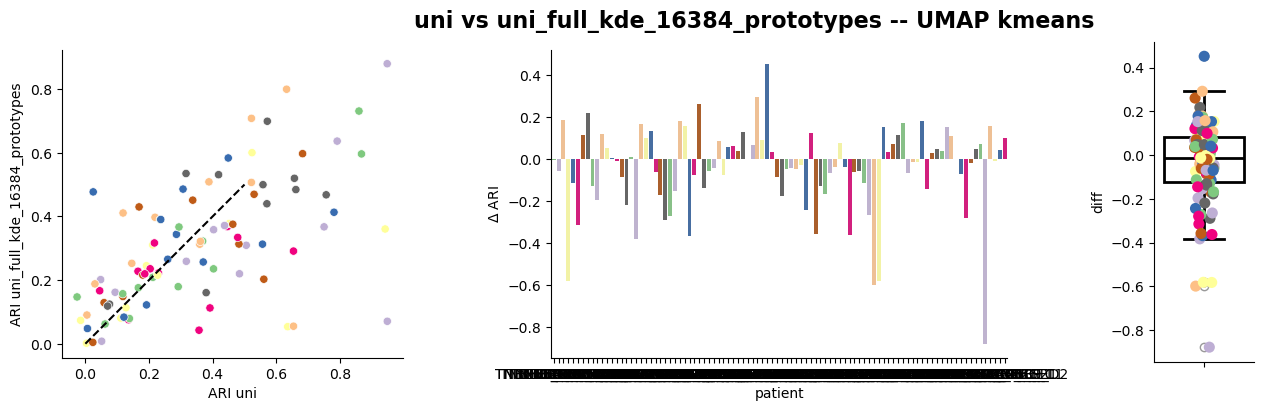

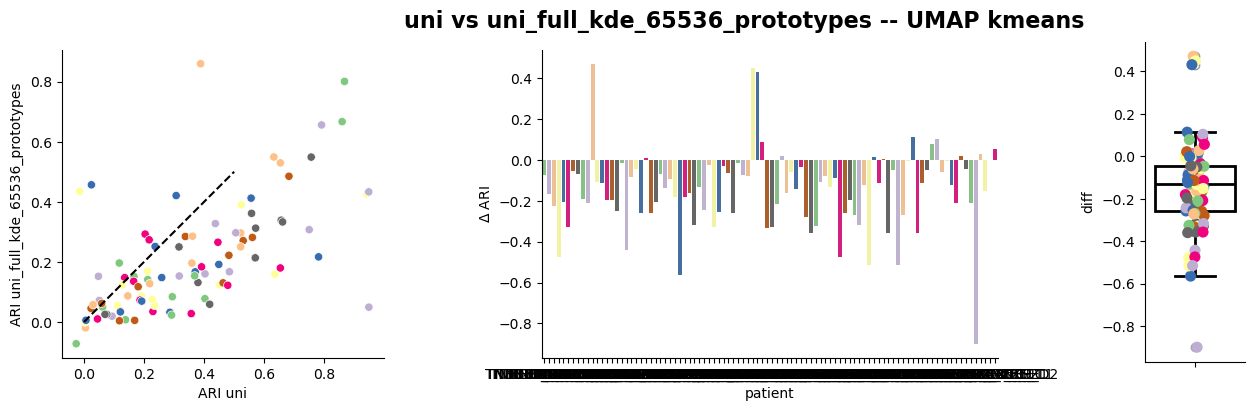

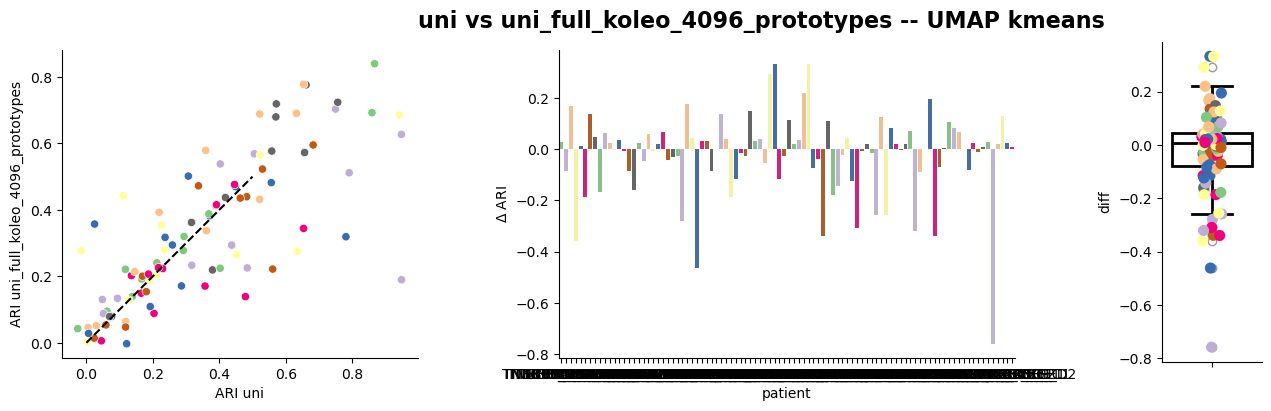

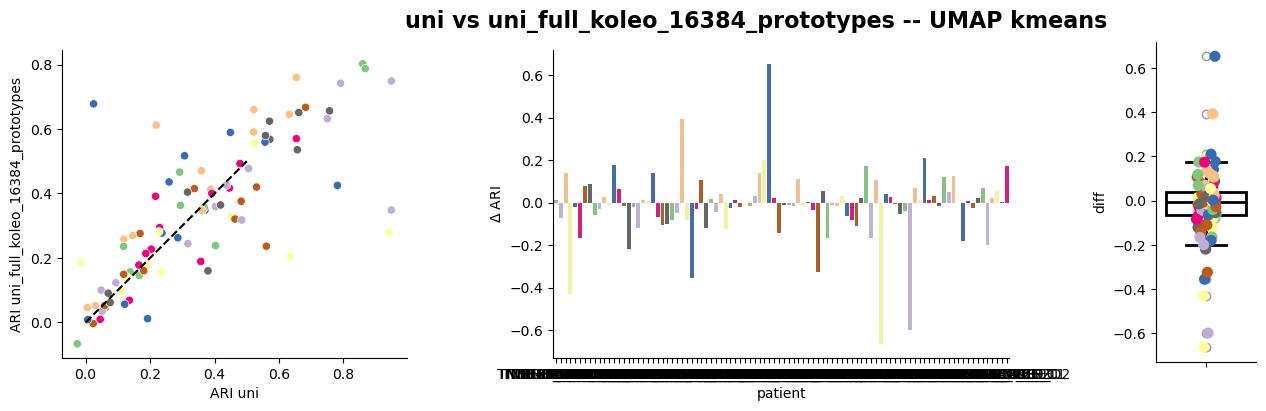

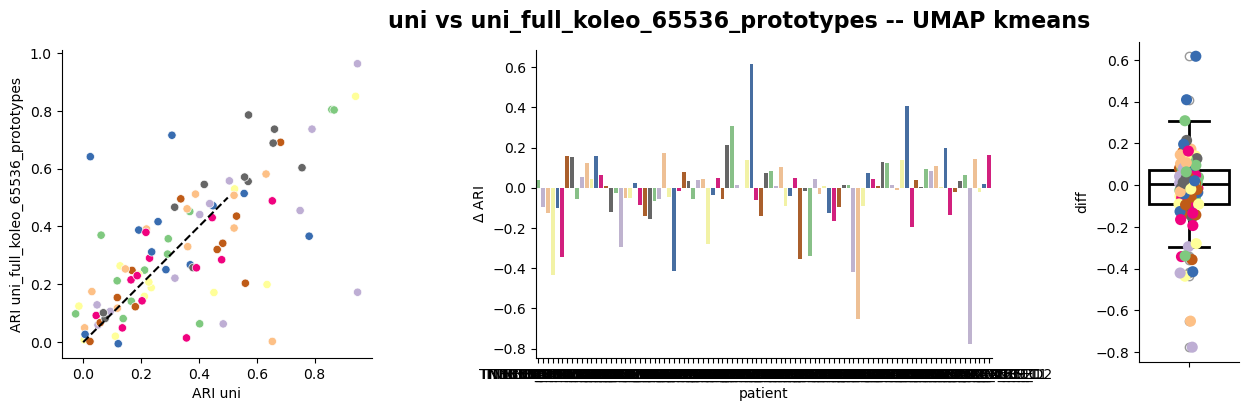

In [19]:
df_comps = {}
for clust_type in ['umap']:
  df_comps[clust_type] = {}
  for pair in pairs_to_compare:
    
    plt.figure(figsize=(20, 4))
    plt.subplot(1, 3, 1)

    df_sub_comp = df_comp[(df_comp['model'] == pair[1]) 
                            & (df_comp['clustering'] == clust_type) 
                            & (df_comp['patient'] != 'mean') 
                            & (df_comp['patient'] != 'all')].merge(df_comp[(df_comp['model'] == pair[0]) 
                                                                        & (df_comp['clustering'] == clust_type) 
                                                                        & (df_comp['patient'] != 'mean') 
                                                                        & (df_comp['patient'] != 'all')], 
                                                                        left_on='patient',
                                                                            right_on='patient', 
                                                                            suffixes=(f'_{pair[1]}', f'_{pair[0]}'))
    
    df_comps[clust_type][f"{pair[1]}"] = df_sub_comp
    
    plt.gca().set_aspect('equal', adjustable='box')
    sns.scatterplot(data=df_sub_comp, x=f'ari_{pair[0]}', y=f'ari_{pair[1]}', hue='patient', palette='Accent')
    plt.plot([0, 0.5], [0, 0.5], color='black', linestyle='--')
    if len(df_sub_comp['patient'].unique()) > 15:
      plt.legend().remove()
    else:
      plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

    # plt.title(f'{pair[0]} vs {pair[1]}', weight='bold')
    plt.xlabel(f'ARI {pair[0]}')
    plt.ylabel(f'ARI {pair[1]}')
    sns.despine()

    plt.subplot(1, 3, 2)
    df_sub_comp['diff'] = df_sub_comp[f'ari_{pair[1]}'] - df_sub_comp[f'ari_{pair[0]}']
    sns.barplot(x='patient', y='diff', data=df_sub_comp, palette='Accent', hue='patient') 
    sns.despine()
    plt.ylabel(r'$\Delta$ ARI')
    # plt.title(f'Difference in ARI {pair[1]} - {pair[0]}', weight='bold')

    plt.subplot(1, 3, 3)
    plt.gca().set_position([0.7, 0.1, 0.05, 0.8])
    sns.boxplot(data=df_sub_comp, y='diff', color='white', linewidth=2,  boxprops=dict(facecolor='white', edgecolor='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            medianprops=dict(color='black'))
    sns.stripplot(data=df_sub_comp, y='diff', hue='patient', palette='Accent', linewidth=0, size=8)
    
    if len(df_sub_comp['patient'].unique()) > 15:
      plt.legend().remove()
    else:
      plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    sns.despine()

    plt.suptitle(f'{pair[0]} vs {pair[1]} -- {clust_type.upper()} kmeans', weight='bold', fontsize=16)
    plt.savefig(os.path.join(config["figures_folder"], f"Figure3/{pair[0]}_vs_{pair[1]}_{clust_type}_kmeans.pdf"), bbox_inches='tight')

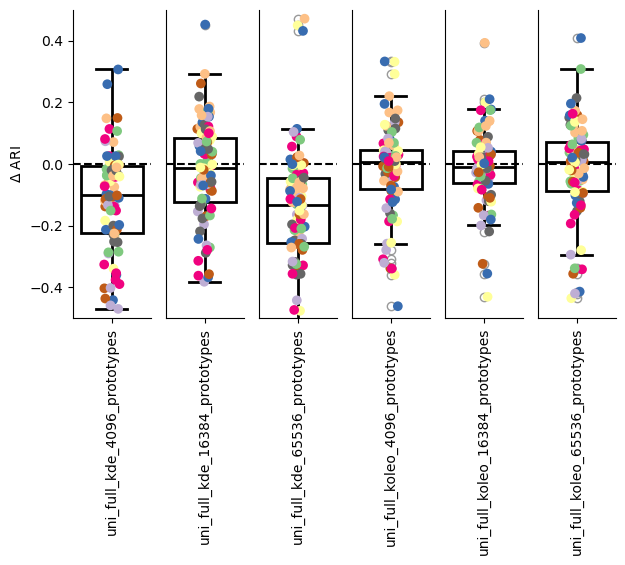

In [20]:
plt.figure(figsize=(7, 4))

df_comps = {}
for clust_type in ['umap']:
  df_comps[clust_type] = {}
  for i, pair in enumerate(pairs_to_compare):
    
    plt.subplot(1, len(pairs_to_compare), i+1)

    df_sub_comp = df_comp[(df_comp['model'] == pair[1]) 
                            & (df_comp['clustering'] == clust_type) 
                            & (df_comp['patient'] != 'mean') 
                            & (df_comp['patient'] != 'all')].merge(df_comp[(df_comp['model'] == pair[0]) 
                                                                        & (df_comp['clustering'] == clust_type) 
                                                                        & (df_comp['patient'] != 'mean') 
                                                                        & (df_comp['patient'] != 'all')], 
                                                                        left_on='patient',
                                                                            right_on='patient', 
                                                                            suffixes=(f'_{pair[1]}', f'_{pair[0]}'))
    
    df_comps[clust_type][f"{pair[1]}"] = df_sub_comp
    


    df_sub_comp['diff'] = df_sub_comp[f'ari_{pair[1]}'] - df_sub_comp[f'ari_{pair[0]}']

    #plt.gca().set_position([0.7, 0.1, 0.05, 0.8])
    sns.boxplot(data=df_sub_comp, y='diff', color='white', linewidth=2,  boxprops=dict(facecolor='white', edgecolor='black'),
            whiskerprops=dict(color='black'),
            capprops=dict(color='black'),
            medianprops=dict(color='black'))
    sns.stripplot(data=df_sub_comp, y='diff', hue='patient', palette='Accent', linewidth=0, size=7)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    sns.despine()
    plt.xticks(ticks=[0], labels=[pair[1]], rotation=90)
    plt.ylim(-0.5, 0.5)
    
    plt.axhline(0, color='black', linestyle='--')
    plt.ylabel(r'$\Delta$ ARI')
    if i != 0:

        plt.gca().axes.get_yaxis().set_visible(False)
    
    if i != len(pairs_to_compare) -1:
        plt.legend().remove()
        
    if len(df_sub_comp['patient'].unique()) > 15:
      plt.legend().remove()
    else:
      plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
        

plt.savefig(os.path.join(config["figures_folder"], f"Figure2/boxplot_ARI_differences_per_patient_{clust_type}_kmeans_{model_type}_models.pdf"), bbox_inches='tight')


In [21]:
df_comp_patient = df_comp[~(df_comp["patient"].isin(["mean", "all"]))]


In [22]:
df_comp[df_comp['clustering'] == 'raw'][['model', 'ari']].groupby('model').mean()

,ari
model,
uni,0.317300
uni_full_kde_16384_prototypes,0.246238
uni_full_kde_4096_prototypes,0.172344
uni_full_kde_65536_prototypes,0.155882
uni_full_koleo_16384_prototypes,0.268186
uni_full_koleo_4096_prototypes,0.272065
uni_full_koleo_65536_prototypes,0.273917


In [23]:
df_comp[df_comp['clustering'] == 'raw'][['model', 'ari']].groupby('model').std()

,ari
model,
uni,0.243616
uni_full_kde_16384_prototypes,0.177674
uni_full_kde_4096_prototypes,0.163691
uni_full_kde_65536_prototypes,0.143377
uni_full_koleo_16384_prototypes,0.187887
uni_full_koleo_4096_prototypes,0.204633
uni_full_koleo_65536_prototypes,0.215065


In [24]:

for value in df_comp[df_comp['clustering'] == 'umap'][['model', 'ari']].groupby('model').std().loc[model_list, 'ari']:
    print(f"{value:.2f}")


0.25
0.20
0.19
0.18
0.22
0.22
0.23


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


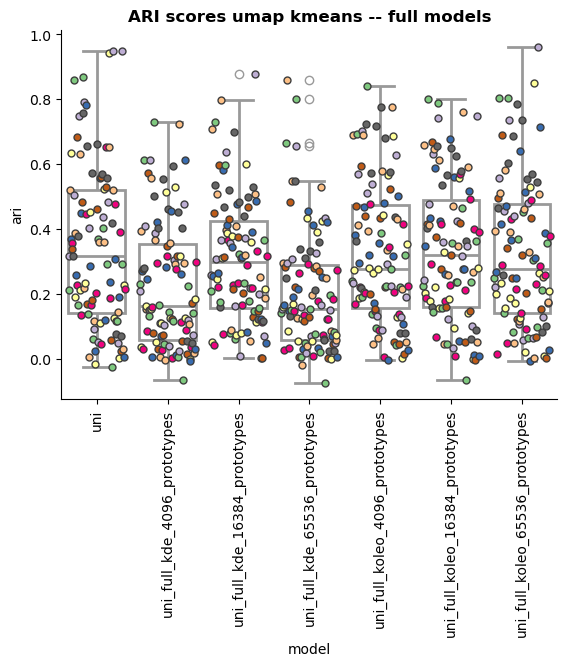

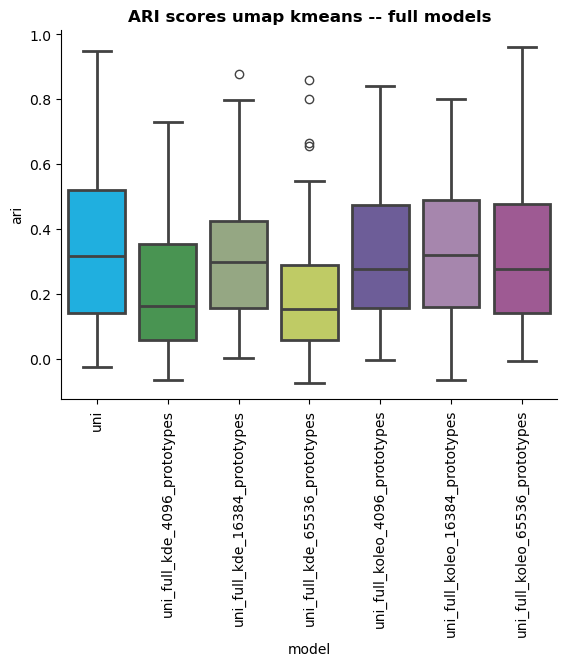

In [25]:
## 
sns.boxplot(data=df_comp_patient[df_comp_patient['clustering'] == 'umap'], x='model', y='ari', color='white', linewidth=2)
sns.stripplot(data=df_comp_patient[df_comp_patient['clustering'] == 'umap'], x='model', y='ari', jitter=True, dodge=True, linewidth=1, hue='patient', palette='Accent')
plt.xticks(rotation=90)
sns.despine()
plt.title('ARI scores for unsupervised clustering', weight='bold')
sns.despine()
plt.title(f"ARI scores umap kmeans -- {model_type} models", weight='bold')

if len(df_comp_patient['patient'].unique()) > 15:
    plt.legend().remove()
else:
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(os.path.join(config["figures_folder"], f"Figure2/ari_scores_umap_kmeans_{model_type}_models_with_patient.pdf"), bbox_inches='tight')

## 
plt.figure()
sns.boxplot(data=df_comp_patient[df_comp_patient['clustering'] == 'umap'], 
            x='model', y='ari', hue='model', linewidth=2, palette=models_palette)
plt.xticks(rotation=90)
sns.despine()
plt.title('ARI scores for unsupervised clustering', weight='bold')
sns.despine()
plt.title(f"ARI scores umap kmeans -- {model_type} models", weight='bold')


if len(df_comp_patient['patient'].unique()) > 15:
    plt.legend().remove()
else:
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(os.path.join(config["figures_folder"], f"Figure3/ari_scores_umap_kmeans_{model_type}_models_colors.pdf"), bbox_inches='tight')

In [26]:

for i, model in enumerate(df_comp['model'].unique()):
    print(model)
    sub_df = df_comp[(df_comp['model'] == model) & (df_comp['clustering'] == 'umap')][['ari', 'patient']].rename(columns = {'ari': model})
    # dfs.append(sub_df)
    if i > 0:
        df = df.merge(sub_df, on='patient')
    else:
        df = sub_df.copy()

df.set_index('patient', inplace=True)
df_delta_ari = df.apply(lambda x: x - df['uni'])
df_delta_ari.drop('uni', axis=1, inplace=True) 

uni
uni_full_kde_4096_prototypes
uni_full_kde_16384_prototypes
uni_full_kde_65536_prototypes
uni_full_koleo_4096_prototypes
uni_full_koleo_16384_prototypes
uni_full_koleo_65536_prototypes


(-0.8, 0.8)

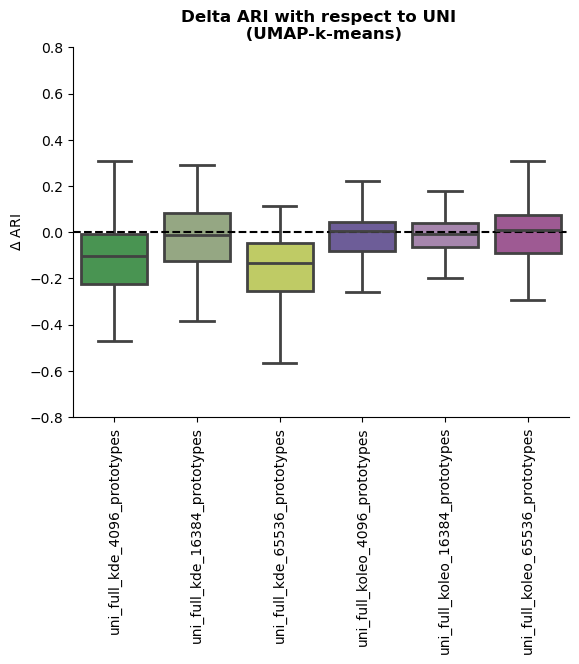

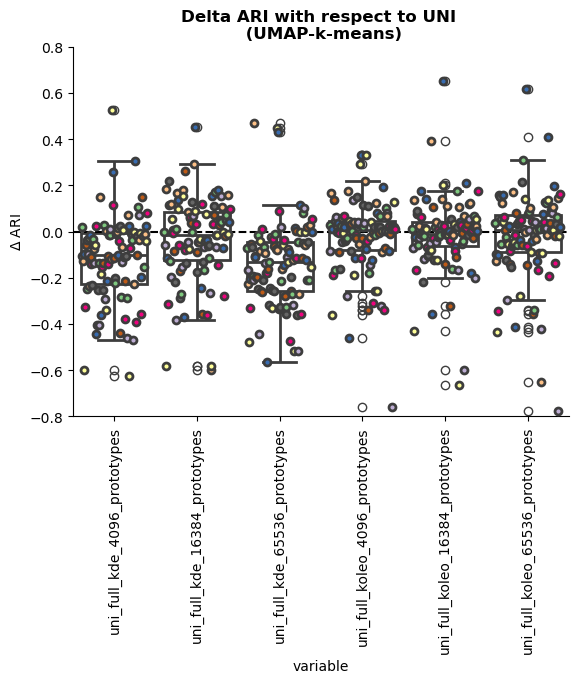

In [27]:
# plot delta ARI
plt.figure()
sns.boxplot(data=df_delta_ari, palette=models_palette, linewidth=2, showfliers=False)
plt.title(f'Delta ARI with respect to UNI \n (UMAP-k-means)', weight='bold')
plt.ylabel(r'$\Delta$ ARI')
sns.despine()
plt.xticks(rotation=90)
plt.axhline(0, color='black', linestyle='--')
plt.savefig(os.path.join(config["figures_folder"], f"Figure2/delta_umap_ari_scores_boxplot_{model_type}_models_colors.pdf"), bbox_inches='tight')
plt.ylim(-0.8, 0.8)

plt.figure()
sns.boxplot(data=df_delta_ari, color='white', linewidth=2)

# sns.stripplot(data=df_delta_ari.reset_index(), palette='Accent', hue='index')
df_long = df_delta_ari.reset_index().melt(id_vars=['patient'], var_name='variable', value_name='value')

# Create the strip plot
sns.stripplot(data=df_long, x='variable', y='value', jitter=True, dodge=True, linewidth=2, palette='Accent', hue='patient')
plt.title(f'Delta ARI with respect to UNI \n (UMAP-k-means)', weight='bold')
plt.ylabel(r'$\Delta$ ARI')
sns.despine()
plt.xticks(rotation=90)
plt.axhline(0, color='black', linestyle='--')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.savefig(os.path.join(config["figures_folder"], f"Figure3/delta_umap_ari_scores_boxplot_{model_type}_models_with_patient.pdf"), bbox_inches='tight')

if df_long['patient'].nunique() > 15:
    plt.legend().remove()
else:
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    
plt.ylim(-0.8, 0.8)

In [28]:
## Correlation with shannon entropy
import json 

with open(os.path.join(benchmark_folder, "shannon_entropy", "shannon_entropy_all_comps_raw.json")) as f:
    shannon_entropy = json.load(f)

In [29]:
os.path.join(benchmark_folder, "shannon_entropy", "shannon_entropy_all_comps_raw.json")

'../results/benchmark/TNBC/uni_full_models/shannon_entropy/shannon_entropy_all_comps_raw.json'

In [30]:
df_shannon = pd.DataFrame.from_dict(shannon_entropy, orient='index', columns=['shannon_entropy'])


In [31]:
df_shannon.rename(index={'handcrafted': 'handcrafted_features'}, inplace=True)

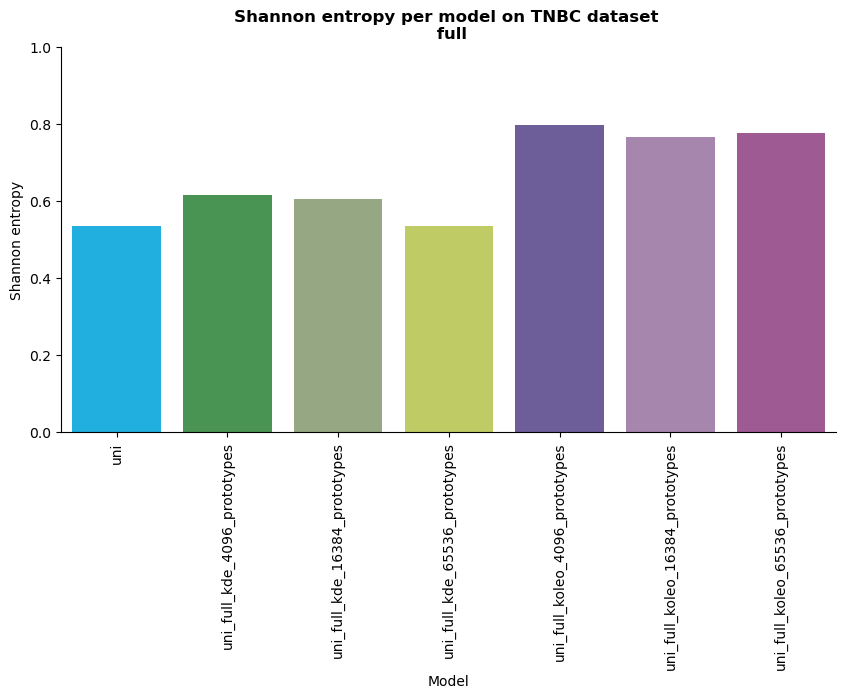

In [32]:
# df_shannon.sort_values('shannon_entropy', inplace=True, ascending=False)
plt.figure(figsize=(10, 5))
sns.barplot(data=df_shannon, 
            x=df_shannon.index, 
            y='shannon_entropy', 
            hue=df_shannon.index, palette=models_palette)
sns.despine()
plt.xlabel("Model")
plt.ylabel("Shannon entropy")
plt.title(f"Shannon entropy per model on {config['dataset']} dataset \n {model_type}", weight='bold')
plt.xticks(rotation=90)
plt.ylim(0,1)
plt.savefig(os.path.join(config["figures_folder"], f"Figure2/shannon_entropy_per_model_{model_type}.pdf"), bbox_inches='tight')

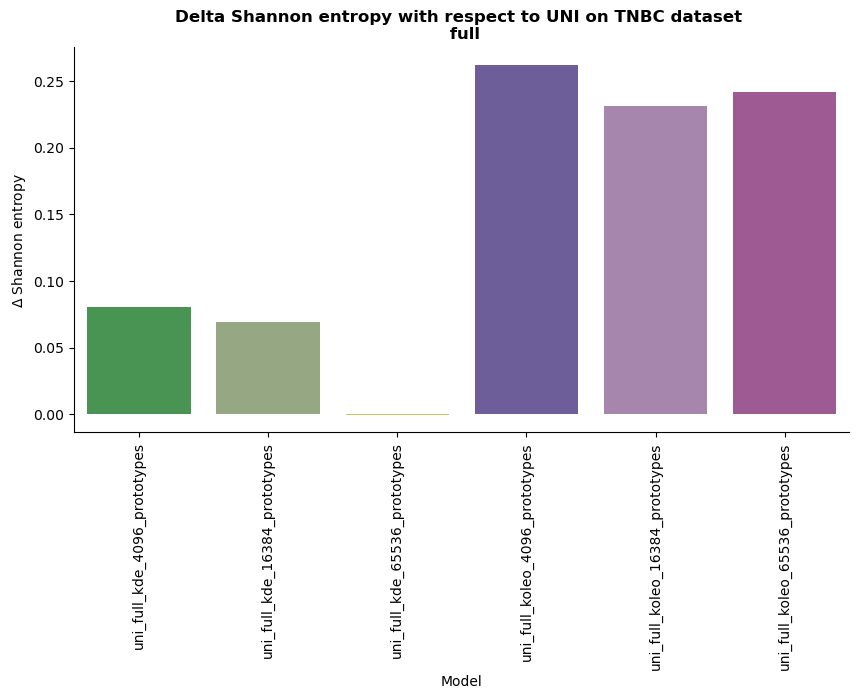

In [33]:
df_shannon_delta = df_shannon.copy()
df_shannon_delta = df_shannon_delta - df_shannon.loc['uni']
df_shannon_delta.drop('uni', inplace=True)

plt.figure(figsize=(10, 5))
sns.barplot(data=df_shannon_delta, 
            x=df_shannon_delta.index, 
            y='shannon_entropy', 
            hue=df_shannon_delta.index, palette=models_palette)
sns.despine()
plt.xlabel("Model")
plt.ylabel(r"$\Delta$ Shannon entropy")
plt.title(f"Delta Shannon entropy with respect to UNI on {config['dataset']} dataset \n {model_type}", weight='bold')
plt.xticks(rotation=90)
plt.savefig(os.path.join(config["figures_folder"], f"Figure3/delta_shannon_entropy_per_model_{model_type}_barplot.pdf"), bbox_inches='tight')





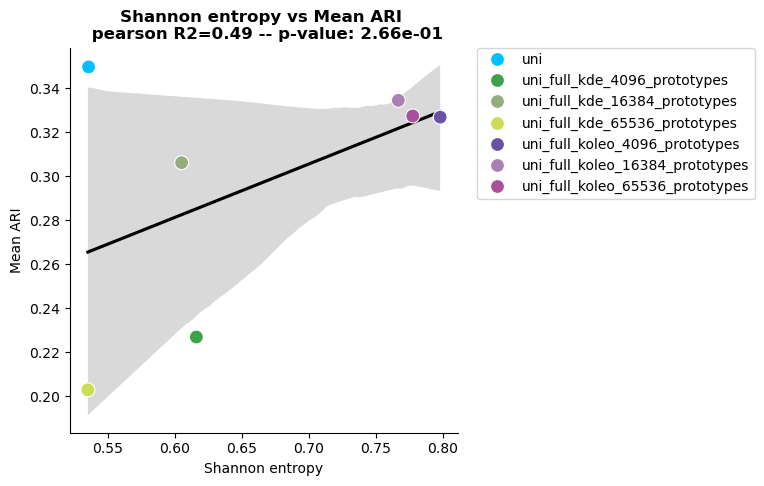

In [35]:

df_shannon = pd.DataFrame.from_dict(shannon_entropy, orient='index', columns=['shannon_entropy'])

mean_ari_per_model = df_comp[df_comp['clustering'] == 'umap'][['model', 'ari']].groupby('model').mean()
mean_ari_per_model.columns = ['mean_ari']

df_model_summary = df_shannon.merge(mean_ari_per_model, left_index=True, right_index=True)

# df_model_summary = df_model_summary.drop(["uni_full_4096_prototypes"])

s, p = pearsonr(df_model_summary['shannon_entropy'], df_model_summary['mean_ari'])
plt.figure(figsize=(5, 5))
sns.regplot(data=df_model_summary, x='shannon_entropy', y='mean_ari', color='black')
sns.scatterplot(data=df_model_summary, x='shannon_entropy', y='mean_ari', hue=df_model_summary.index,
                palette=models_palette, zorder=2, s=100)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Shannon entropy')
plt.ylabel('Mean ARI')
plt.title(f'Shannon entropy vs Mean ARI \n pearson R2={s:.2f} -- p-value: {p:.2e}', weight='bold')
sns.despine()
plt.savefig(os.path.join(config["figures_folder"], f"Figure3/shannon_entropy_vs_mean_ari_{model_type}_models.pdf"), bbox_inches='tight')

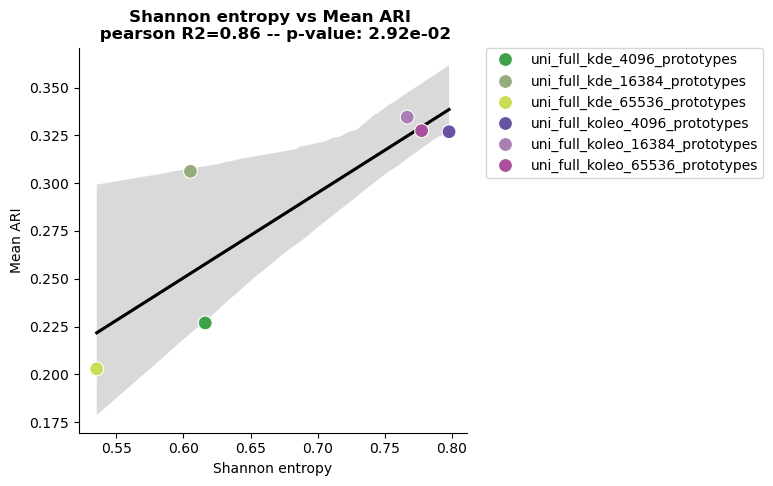

In [38]:


# df_model_summary = df_model_summary.drop(["uni_full_4096_prototypes"])

s, p = pearsonr(df_model_summary.drop("uni")['shannon_entropy'], df_model_summary.drop("uni")['mean_ari'])
plt.figure(figsize=(5, 5))
sns.regplot(data=df_model_summary.drop("uni"), x='shannon_entropy', y='mean_ari', color='black')
sns.scatterplot(data=df_model_summary.drop("uni"), x='shannon_entropy', y='mean_ari', hue=df_model_summary.drop("uni").index,
                palette=models_palette, zorder=2, s=100)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Shannon entropy')
plt.ylabel('Mean ARI')
plt.title(f'Shannon entropy vs Mean ARI \n pearson R2={s:.2f} -- p-value: {p:.2e}', weight='bold')
sns.despine()

In [45]:
overall_umap = benchmark_clustering.get_best_UMAP_ari_overall(annotated_only=False)

overall_umap_aris = {}
for model in overall_umap.keys():
    overall_umap_aris[model] = overall_umap[model]['ari']

df_model_summary['overall_ari'] = pd.Series(overall_umap_aris)

Computing best UMAP parameters for model uni...
Loading best UMAP parameters for model uni...
Computing best UMAP parameters for model uni_full_kde_4096_prototypes...
Loading best UMAP parameters for model uni_full_kde_4096_prototypes...
Computing best UMAP parameters for model uni_full_kde_16384_prototypes...
Loading best UMAP parameters for model uni_full_kde_16384_prototypes...
Computing best UMAP parameters for model uni_full_kde_65536_prototypes...
Loading best UMAP parameters for model uni...
Computing best UMAP parameters for model uni_full_kde_4096_prototypes...
Loading best UMAP parameters for model uni_full_kde_4096_prototypes...
Computing best UMAP parameters for model uni_full_kde_16384_prototypes...
Loading best UMAP parameters for model uni_full_kde_16384_prototypes...
Computing best UMAP parameters for model uni_full_kde_65536_prototypes...
Loading best UMAP parameters for model uni_full_kde_65536_prototypes...
Computing best UMAP parameters for model uni_full_koleo_4096

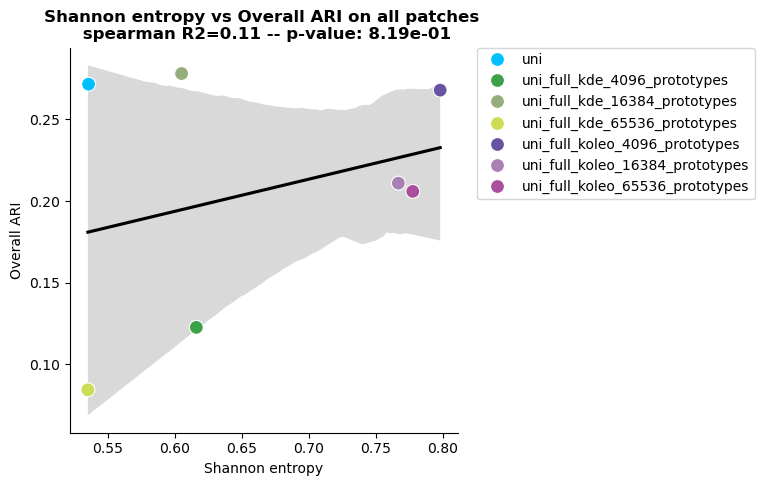

In [46]:
s, p = spearmanr(df_model_summary['shannon_entropy'], df_model_summary['overall_ari'])
plt.figure(figsize=(5, 5))
sns.regplot(data=df_model_summary, x='shannon_entropy', y='overall_ari', color='black')
sns.scatterplot(data=df_model_summary, x='shannon_entropy', y='overall_ari', hue=df_model_summary.index,
                palette=models_palette, s=100)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Shannon entropy')
plt.ylabel('Overall ARI')
plt.title(f'Shannon entropy vs Overall ARI on all patches \n spearman R2={s:.2f} -- p-value: {p:.2e}', weight='bold')
sns.despine()
plt.savefig(os.path.join(config["figures_folder"], f"Figure2/shannon_entropy_vs_overall_ari_{model_type}_models.pdf"), bbox_inches='tight')

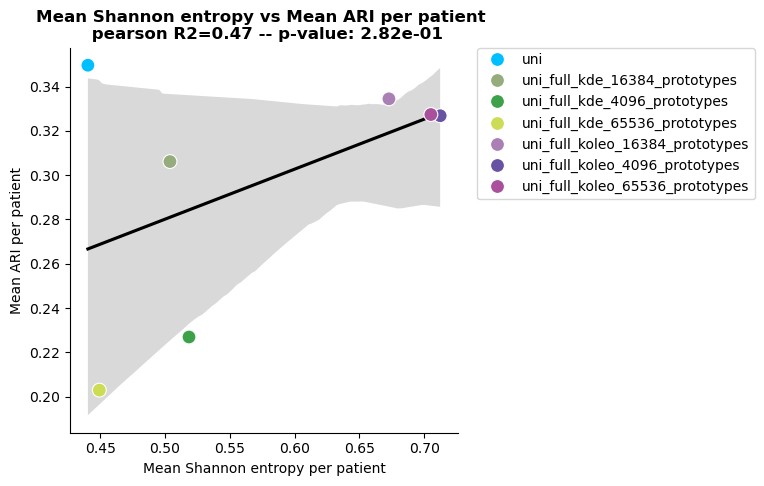

In [48]:
with open(os.path.join(benchmark_folder, "shannon_entropy", "shannon_entropy_per_tumor_all_comps_raw.json")) as f:
    shannon_per_patient = json.load(f)
df_shannon_per_patient = pd.DataFrame.from_dict(shannon_per_patient, orient='index')
df_shannon_per_patient

df_model_summary2 = df_comp[df_comp["clustering"] == 'umap'].merge(df_shannon_per_patient, left_on='patient', right_index=True, how='left')

df_shannon_per_patient_melted = pd.melt(df_shannon_per_patient, var_name='patient', value_name='shannon_entropy_per_patient')
df_shannon_per_patient_melted['model'] = list(df_shannon_per_patient.index) * len(df_shannon_per_patient.columns)

if config['dataset'] == 'HER2':
    df_comp['patient'] = df_comp['patient'].apply(lambda x: x[0])
else:
    df_comp['patient'] = df_comp['patient'].apply(lambda x: x.split('_')[0])

df_model_summary2 = df_comp[df_comp["clustering"] == 'umap'].merge(df_shannon_per_patient_melted, on=['patient', 'model'])

mean_vs_mean = df_model_summary2.groupby('model').mean()

s, p = pearsonr(mean_vs_mean['shannon_entropy_per_patient'], mean_vs_mean['ari'])
plt.figure(figsize=(5, 5))
sns.regplot(data=mean_vs_mean, x='shannon_entropy_per_patient', y='ari', color='black')
sns.scatterplot(data=mean_vs_mean, x='shannon_entropy_per_patient', y='ari', hue=mean_vs_mean.index,
                palette=models_palette, s=100, zorder=2)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Mean Shannon entropy per patient')
plt.ylabel('Mean ARI per patient')
plt.title(f'Mean Shannon entropy vs Mean ARI per patient \n pearson R2={s:.2f} -- p-value: {p:.2e}', weight='bold')
sns.despine()

In [49]:
benchmark_clustering_explora = BenchmarkClustering(path_to_pipeline=config['path_to_retrained_pipelines_1'],
                                           pipelines_list=config["retrained_model_list1"],
                                           results_folder="../results",
                                           saving_folder=os.path.join(config["retrained_benchmark_folder1"], "unsupervised_clustering_ARI", "kmeans"),
                                           dataset=config['dataset'],
                                           extension=extension
                                           )

benchmark_clustering_full = BenchmarkClustering(path_to_pipeline=config['path_to_retrained_pipelines_2'],
                                           pipelines_list=config["retrained_model_list2"],
                                           results_folder="../results",
                                           saving_folder=os.path.join(config["retrained_benchmark_folder2"], "unsupervised_clustering_ARI", "kmeans"),
                                           dataset=config['dataset'],
                                           extension=extension
                                           )

['uni', 'uni_explora_kde_4096_prototypes', 'uni_explora_kde_16384_prototypes', 'uni_explora_kde_65536_prototypes', 'uni_explora_koleo_4096_prototypes', 'uni_explora_koleo_16384_prototypes', 'uni_explora_koleo_65536_prototypes']
<class 'list'>
Creating folder ../results/benchmark/TNBC/uni_explora_models/unsupervised_clustering_ARI/kmeans...
Label files: ['../results/compute_patches/TNBC/spots_labels.csv']
['uni', 'uni_full_kde_4096_prototypes', 'uni_full_kde_16384_prototypes', 'uni_full_kde_65536_prototypes', 'uni_full_koleo_4096_prototypes', 'uni_full_koleo_16384_prototypes', 'uni_full_koleo_65536_prototypes']
<class 'list'>
Label files: ['../results/compute_patches/TNBC/spots_labels.csv']


## Comparison between full and explora

Loading unsupervised clustering results for model uni...
Loading unsupervised clustering results for model uni_full_kde_4096_prototypes...
Loading unsupervised clustering results for model uni_full_kde_16384_prototypes...
Loading unsupervised clustering results for model uni_full_kde_65536_prototypes...
Loading unsupervised clustering results for model uni_full_koleo_4096_prototypes...
Loading unsupervised clustering results for model uni_full_koleo_16384_prototypes...
Loading unsupervised clustering results for model uni_full_koleo_65536_prototypes...
Computing raw clustering for model uni, obsm None


KeyError: 'uni'

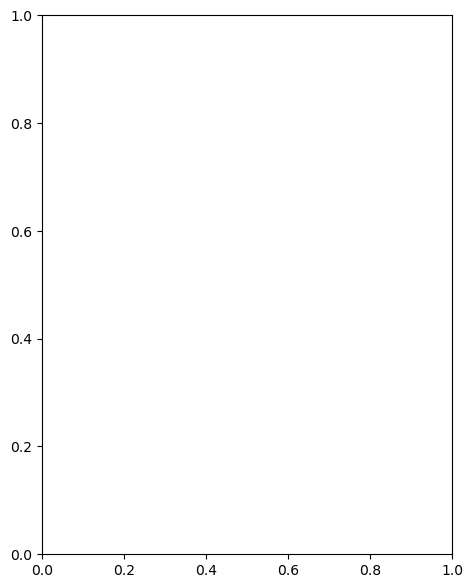

In [50]:
plt.figure(figsize=(18, 7))

##################### RAW #####################
plt.subplot(1,3,1)
try:
    with open(os.path.join(config['retrained_benchmark_folder2'], 'unsupervised_clustering_ARI', 'kmeans', 'unsupervised_clustering_results_optk.json')) as f:
        ari_overall_full = json.load(f)
except:
    ari_overall_full = benchmark_clustering_full.unsupervised_clustering_benchmark(clustering_name="raw")
    aris = {}
    for model in ari_overall_full.keys():
        aris[model] = ari_overall_full[model]['all']['ari']
        
    df_ari_full = pd.DataFrame(aris, index=['ari']).T
    df_ari_full['model_type'] = config['retrained_model_list2_type']

try:
    with open(os.path.join(config['retrained_benchmark_folder1'], 'unsupervised_clustering_ARI', 'kmeans', 'unsupervised_clustering_results_optk.json')) as f:
        ari_overall_explora= json.load(f)
except:
    ari_overall_explora = benchmark_clustering_explora.unsupervised_clustering_benchmark(n_clusters=None, clustering_name="raw")
        
    aris = {}
    for model in ari_overall_explora.keys():
        aris[model] = ari_overall_explora[model]['all']['ari']
        
    df_ari_explora = pd.DataFrame(aris, index=['ari']).T
    df_ari_explora['model_type'] = config['retrained_model_list1_type']

df = pd.concat([df_ari_explora, df_ari_full])
df["params"] = ["_".join(idx.split("_")[2:])  if "prototypes" in idx else idx for idx in df.index]
sns.barplot(data=df, x="params", y="ari", hue="model_type", palette=['lightgray', 'black'])
plt.xticks(rotation=90)

plt.title(f"ARI on all patches \n (raw-kmeans)", weight='bold')
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()
plt.ylim(0, 0.32)

###################### SVD #####################
plt.subplot(1,3,2)


try:
    with open(os.path.join(config['retrained_benchmark_folder2'], 'unsupervised_clustering_ARI', 'kmeans', 'svd5_multiplied_by_S_unsupervised_clustering_results_optk.json')) as f:
        ari_overall_full = json.load(f)
except:
    ari_overall_full = benchmark_clustering_full.unsupervised_clustering_benchmark(n_clusters=None, clustering_name="svd5")
    aris = {}
    for model in ari_overall_full.keys():
        aris[model] = ari_overall_full[model]['all']['ari']
        
    df_ari_full = pd.DataFrame(aris, index=['ari']).T
    df_ari_full['model_type'] = config['retrained_model_list2_type']

try:
    with open(os.path.join(config['retrained_benchmark_folder1'], 'unsupervised_clustering_ARI', 'kmeans', 'svd5_multiplied_by_S_unsupervised_clustering_results_optk.json')) as f:
        ari_overall_explora= json.load(f)
except:
    ari_overall_explora = benchmark_clustering_explora.unsupervised_clustering_benchmark(n_clusters=None, clustering_name="svd5")
    aris = {}
    for model in ari_overall_explora.keys():
        aris[model] = ari_overall_explora[model]['all']['ari']
        
    df_ari_explora = pd.DataFrame(aris, index=['ari']).T
    df_ari_explora['model_type'] = config['retrained_model_list1_type']

df = pd.concat([df_ari_explora, df_ari_full])
df["params"] = ["_".join(idx.split("_")[2:])  if "prototypes" in idx else idx for idx in df.index]
sns.barplot(data=df, x="params", y="ari", hue="model_type", palette=['lightgray', 'black'])
plt.xticks(rotation=90)

plt.title(f"ARI on all patches \n (svd5-kmeans)", weight='bold')
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()
plt.ylim(0, 0.32)

#################### UMAP #####################
plt.subplot(1,3,3)
try:
    with open(os.path.join(config['retrained_benchmark_folder2'], 'unsupervised_clustering_ARI', 'kmeans', 'best_umap_ari_overall.json')) as f:
        ari_overall_full = json.load(f)
except:
    ari_overall_full = benchmark_clustering_full.get_best_UMAP_ari_overall()

df_ari_overall_full = pd.DataFrame(ari_overall_full).T[['ari']]
df_ari_overall_full['model_type'] = config['retrained_model_list2_type']
df_ari_overall_full['dataset'] = df_ari_overall_full.index

try:
    with open(os.path.join(config['retrained_benchmark_folder1'], 'unsupervised_clustering_ARI', 'kmeans', 'best_umap_ari_overall.json')) as f:
        ari_overall_explora= json.load(f)
except:
    ari_overall_explora = benchmark_clustering_explora.get_best_UMAP_ari_overall()

df_ari_overall_explora = pd.DataFrame(ari_overall_explora).T[['ari']]
df_ari_overall_explora['model_type'] = config['retrained_model_list1_type']
df_ari_overall_explora['dataset'] = df_ari_overall_explora.index



df = pd.concat([df_ari_overall_explora, df_ari_overall_full])
df["params"] = ["_".join(idx.split("_")[2:])  if "prototypes" in idx else idx for idx in df.index]
sns.barplot(data=df, x="params", y="ari", hue="model_type", palette=['lightgray', 'black'])
plt.xticks(rotation=90)

plt.title(f"ARI on all patches \n (UMAP-kmeans)", weight='bold')
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()
plt.ylim(0, 0.5)

plt.savefig(os.path.join(config["figures_folder"], "Figure2/ARI_scores_all_patches_full_vs_explora_models_raw_svd5_umap.pdf"), bbox_inches='tight')

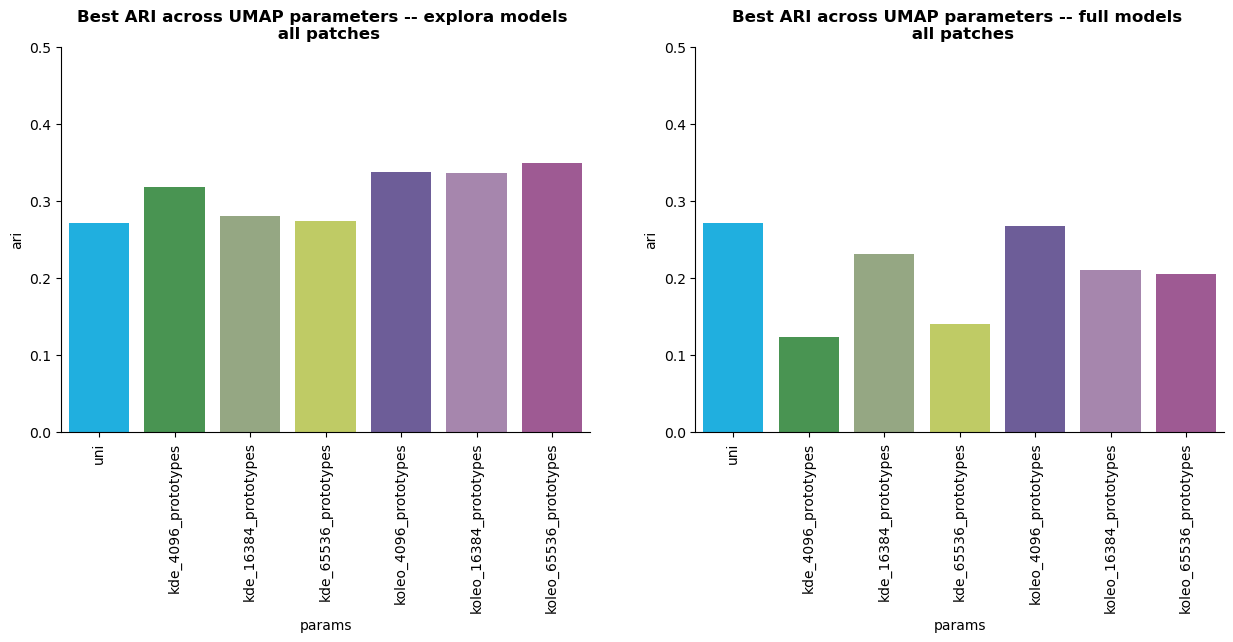

In [44]:
plt.figure(figsize=(15, 5), )

plt.subplot(1, 2, 1)
sns.barplot(data=df[df['model_type'] == config['retrained_model_list1_type']], x="params", y="ari", hue="params", palette=a+['lightgrey'])
plt.xticks(rotation=90)
plt.title(f"Best ARI across UMAP parameters -- {config['retrained_model_list1_type']} models \n all patches", weight='bold')
sns.despine()
plt.ylim(0, 0.5)

plt.subplot(1, 2, 2)
sns.barplot(data=df[df['model_type'] == config['retrained_model_list2_type']], x="params", y="ari", hue="params", palette=a+['lightgrey'])
plt.xticks(rotation=90)
plt.title(f"Best ARI across UMAP parameters -- {config['retrained_model_list2_type']} models \n all patches", weight='bold')
sns.despine()
plt.ylim(0, 0.5)
plt.savefig(os.path.join(config["figures_folder"], "Figure3/best_ari_across_umap_parameters_full_vs_explora_models.pdf"), bbox_inches='tight')

In [45]:
try:
    with open(os.path.join(config['retrained_benchmark_folder2'], 'unsupervised_clustering_ARI', 'kmeans', 'unsupervised_clustering_results_optk.json')) as f:
        ari_overall_full = json.load(f)
except:
    ari_overall_full = benchmark_clustering_full.unsupervised_clustering_benchmark(clustering_name='raw', n_clusters=None)

    aris = {}
    for model in ari_overall_full.keys():
        aris[model] = ari_overall_full[model]['all']['ari']
        
    df_ari_full = pd.DataFrame(aris, index=['ari']).T
    df_ari_full['model_type'] = config['retrained_model_list2_type']

try:
    with open(os.path.join(config['retrained_benchmark_folder1'], 'unsupervised_clustering_ARI', 'kmeans', 'unsupervised_clustering_results_optk.json')) as f:
        ari_overall_explora = json.load(f)
    
except:
    ari_overall_explora = benchmark_clustering_explora.unsupervised_clustering_benchmark(clustering_name='raw', n_clusters=None)

    aris = {}
    for model in ari_overall_explora.keys():
        aris[model] = ari_overall_explora[model]['all']['ari']
        
    df_ari_explora = pd.DataFrame(aris, index=['ari']).T
    df_ari_explora['model_type'] = config['retrained_model_list1_type']

df = pd.concat([df_ari_explora, df_ari_full])
df["params"] = ["_".join(idx.split("_")[2:])  if "prototypes" in idx else idx for idx in df.index]

Loading unsupervised clustering results for model uni...
Loading unsupervised clustering results for model uni_full_kde_4096_prototypes...
Loading unsupervised clustering results for model uni_full_kde_16384_prototypes...
Loading unsupervised clustering results for model uni_full_kde_65536_prototypes...
Loading unsupervised clustering results for model uni_full_koleo_4096_prototypes...
Loading unsupervised clustering results for model uni_full_koleo_16384_prototypes...
Loading unsupervised clustering results for model uni_full_koleo_65536_prototypes...
Loading unsupervised clustering results for model uni...
Loading unsupervised clustering results for model uni_explora_kde_4096_prototypes...
Loading unsupervised clustering results for model uni_explora_kde_16384_prototypes...
Loading unsupervised clustering results for model uni_explora_kde_65536_prototypes...
Loading unsupervised clustering results for model uni_explora_koleo_4096_prototypes...
Loading unsupervised clustering results 

Loading unsupervised clustering results for model uni...
Loading unsupervised clustering results for model uni_full_kde_4096_prototypes...
Loading unsupervised clustering results for model uni_full_kde_16384_prototypes...
Loading unsupervised clustering results for model uni_full_kde_65536_prototypes...
Loading unsupervised clustering results for model uni_full_koleo_4096_prototypes...
Loading unsupervised clustering results for model uni_full_koleo_16384_prototypes...
Loading unsupervised clustering results for model uni_full_koleo_65536_prototypes...
Loading unsupervised clustering results for model uni...
Loading unsupervised clustering results for model uni_explora_kde_4096_prototypes...
Loading unsupervised clustering results for model uni_explora_kde_16384_prototypes...
Loading unsupervised clustering results for model uni_explora_kde_65536_prototypes...
Loading unsupervised clustering results for model uni_explora_koleo_4096_prototypes...
Loading unsupervised clustering results 

Loading unsupervised clustering results for model uni...
Loading unsupervised clustering results for model uni_full_kde_4096_prototypes...
Loading unsupervised clustering results for model uni_full_kde_16384_prototypes...
Loading unsupervised clustering results for model uni_full_kde_65536_prototypes...
Loading unsupervised clustering results for model uni_full_koleo_4096_prototypes...
Loading unsupervised clustering results for model uni_full_koleo_16384_prototypes...
Loading unsupervised clustering results for model uni_full_koleo_65536_prototypes...
Loading unsupervised clustering results for model uni...
Loading unsupervised clustering results for model uni_explora_kde_4096_prototypes...
Loading unsupervised clustering results for model uni_explora_kde_16384_prototypes...
Loading unsupervised clustering results for model uni_explora_kde_65536_prototypes...
Loading unsupervised clustering results for model uni_explora_koleo_4096_prototypes...
Loading unsupervised clustering results 

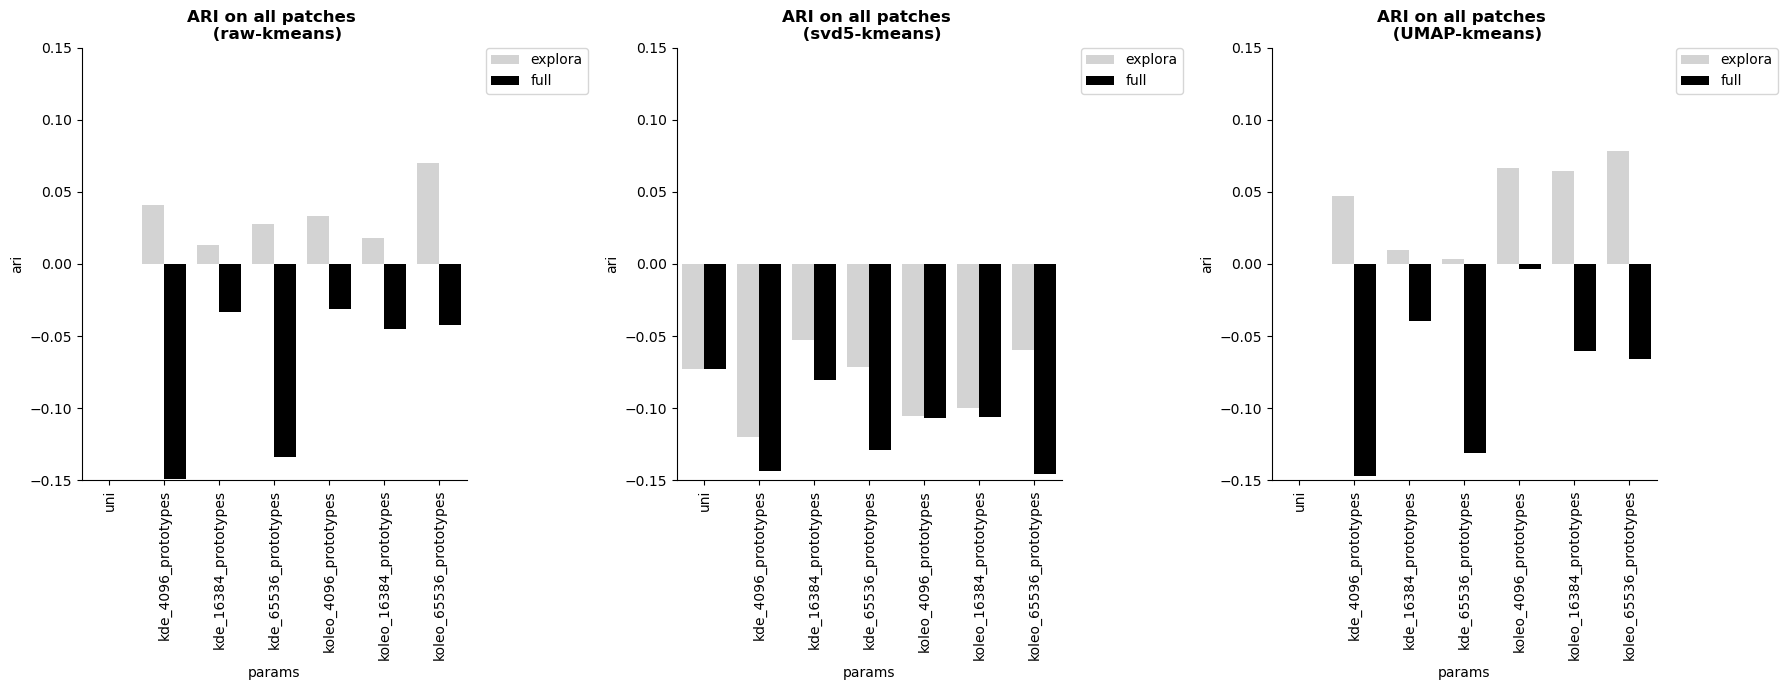

In [46]:
plt.figure(figsize=(18, 7))

##################### RAW #####################
plt.subplot(1,3,1)

try:
    with open(os.path.join(config['retrained_benchmark_folder2'], 'unsupervised_clustering_ARI', 'kmeans', 'unsupervised_clustering_results_optk.json')) as f:
        ari_overall_full = json.load(f)
except:
    ari_overall_full = benchmark_clustering_full.unsupervised_clustering_benchmark(clustering_name='raw', n_clusters=None)

    aris = {}
    for model in ari_overall_full.keys():
        aris[model] = ari_overall_full[model]['all']['ari']
        
    df_ari_full_delta = pd.DataFrame(aris, index=['ari']).T
    df_ari_full_delta['model_type'] = config['retrained_model_list2_type']
    df_ari_full_delta['ari'] = df_ari_full_delta['ari'] - df_ari_full.loc['uni', 'ari']

try:
    with open(os.path.join(config['retrained_benchmark_folder1'], 'unsupervised_clustering_ARI', 'kmeans', 'unsupervised_clustering_results_optk.json')) as f:
        ari_overall_explora= json.load(f)
except:
    ari_overall_explora = benchmark_clustering_explora.unsupervised_clustering_benchmark(clustering_name='raw', n_clusters=None)
    
    aris = {}
    for model in ari_overall_explora.keys():
        aris[model] = ari_overall_explora[model]['all']['ari']
        
    df_ari_explora_delta = pd.DataFrame(aris, index=['ari']).T
    df_ari_explora_delta['model_type'] = config['retrained_model_list1_type']
    df_ari_explora_delta['ari'] = df_ari_explora_delta['ari'] - df_ari_explora.loc['uni', 'ari']

df = pd.concat([df_ari_explora_delta, df_ari_full_delta])
df["params"] = ["_".join(idx.split("_")[2:])  if "prototypes" in idx else idx for idx in df.index]
sns.barplot(data=df, x="params", y="ari", hue="model_type", palette=['lightgray', 'black'])
plt.xticks(rotation=90)

plt.title(f"ARI on all patches \n (raw-kmeans)", weight='bold')
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()
plt.ylim(-0.15, 0.15)

###################### SVD #####################
plt.subplot(1,3,2)

try:
    with open(os.path.join(config['retrained_benchmark_folder2'], 'unsupervised_clustering_ARI', 'kmeans', 'svd5_multiplied_by_S_unsupervised_clustering_results_optk.json')) as f:
        ari_overall_full = json.load(f)
except:
    ari_overall_full = benchmark_clustering_full.unsupervised_clustering_benchmark(n_clusters=None, clustering_name="svd5")

    aris = {}
    for model in ari_overall_full.keys():
        aris[model] = ari_overall_full[model]['all']['ari']
        
    df_ari_full_delta = pd.DataFrame(aris, index=['ari']).T
    df_ari_full_delta['model_type'] = config['retrained_model_list2_type']
    df_ari_full_delta['ari'] = df_ari_full_delta['ari'] - df_ari_full.loc['uni', 'ari']

try:
    with open(os.path.join(config['retrained_benchmark_folder1'], 'unsupervised_clustering_ARI', 'kmeans', 'svd5_multiplied_by_S_unsupervised_clustering_results_optk.json')) as f:
        ari_overall_explora= json.load(f)
except:
    ari_overall_explora = benchmark_clustering_explora.unsupervised_clustering_benchmark(n_clusters=None, clustering_name="svd5")
    
    aris = {}
    for model in ari_overall_explora.keys():
        aris[model] = ari_overall_explora[model]['all']['ari']
        
    df_ari_explora_delta = pd.DataFrame(aris, index=['ari']).T
    df_ari_explora_delta['model_type'] = config['retrained_model_list1_type']
    df_ari_explora_delta['ari'] = df_ari_explora_delta['ari'] - df_ari_explora.loc['uni', 'ari']


df = pd.concat([df_ari_explora_delta, df_ari_full_delta])
df["params"] = ["_".join(idx.split("_")[2:])  if "prototypes" in idx else idx for idx in df.index]
sns.barplot(data=df, x="params", y="ari", hue="model_type", palette=['lightgray', 'black'])
plt.xticks(rotation=90)

plt.title(f"ARI on all patches \n (svd5-kmeans)", weight='bold')
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()
plt.ylim(-0.15, 0.15)

#################### UMAP #####################
plt.subplot(1,3,3)

try:
    with open(os.path.join(config['retrained_benchmark_folder2'], 'unsupervised_clustering_ARI',  'kmeans', 'best_umap_ari_overall.json')) as f:
        ari_overall_full = json.load(f)
except:
    ari_overall_full = benchmark_clustering_full.get_best_UMAP_ari_overall()

df_ari_overall_full_delta = pd.DataFrame(ari_overall_full).T[['ari']]
df_ari_overall_full_delta['model_type'] = config['retrained_model_list2_type']
df_ari_overall_full_delta['dataset'] = df_ari_overall_full_delta.index    
df_ari_overall_full_delta['ari'] = df_ari_overall_full_delta['ari'] - df_ari_overall_full_delta.loc['uni', 'ari']

try:
    
    with open(os.path.join(config['retrained_benchmark_folder1'], 'unsupervised_clustering_ARI','kmeans', 'best_umap_ari_overall.json')) as f:
        ari_overall_explora= json.load(f)
except:
    ari_overall_explora = benchmark_clustering_explora.get_best_UMAP_ari_overall()
    
df_ari_overall_explora_delta = pd.DataFrame(ari_overall_explora).T[['ari']]
df_ari_overall_explora_delta['model_type'] = config['retrained_model_list1_type']
df_ari_overall_explora_delta['dataset'] = df_ari_overall_explora_delta.index
df_ari_overall_explora_delta['ari'] = df_ari_overall_explora_delta['ari'] - df_ari_overall_explora_delta.loc['uni', 'ari']


df = pd.concat([df_ari_overall_explora_delta, df_ari_overall_full_delta])
df["params"] = ["_".join(idx.split("_")[2:])  if "prototypes" in idx else idx for idx in df.index]
sns.barplot(data=df, x="params", y="ari", hue="model_type", palette=['lightgray', 'black'])
plt.xticks(rotation=90)

plt.title(f"ARI on all patches \n (UMAP-kmeans)", weight='bold')
sns.despine()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.tight_layout()
plt.ylim(-0.15, 0.15)

plt.savefig(os.path.join(config["figures_folder"], "Figure2/delta_ARI_scores_all_patches_full_vs_explora_models_raw_svd5_umap.pdf"), bbox_inches='tight')

In [49]:
try:
    with open(os.path.join(config['retrained_benchmark_folder2'], "unsupervised_clustering_ARI", 'kmeans', "ARI_patient.json")) as f:
        patient_ari_full = json.load(f)
except:
    patient_ari_full = benchmark_clustering_full.compute_umap_ARI_patient_for_batch_control()

df_full = pd.DataFrame(patient_ari_full, index=['batch_ari']).T
df_full['model'] = config['retrained_model_list2_type']
    
try:
    with open(os.path.join(config['retrained_benchmark_folder1'], "unsupervised_clustering_ARI", 'kmeans', "ARI_patient.json")) as f:
        patient_ari_explora = json.load(f)
except:
    patient_ari_explora = benchmark_clustering_explora.compute_umap_ARI_patient_for_batch_control()

df_explora = pd.DataFrame(patient_ari_explora, index=['batch_ari']).T    
df_explora['model'] = config['retrained_model_list1_type']

df_batch = pd.concat([df_full, df_explora])
df_batch["params"] = ["_".join(idx.split("_")[2:])  if "prototypes" in idx else idx for idx in df_batch.index]  





Loading ARI for model uni...
Loading ARI for model uni_full_kde_4096_prototypes...
Loading ARI for model uni_full_kde_16384_prototypes...
Loading ARI for model uni_full_kde_65536_prototypes...
Loading ARI for model uni_full_koleo_4096_prototypes...
Loading ARI for model uni_full_koleo_16384_prototypes...
Loading ARI for model uni_full_koleo_65536_prototypes...


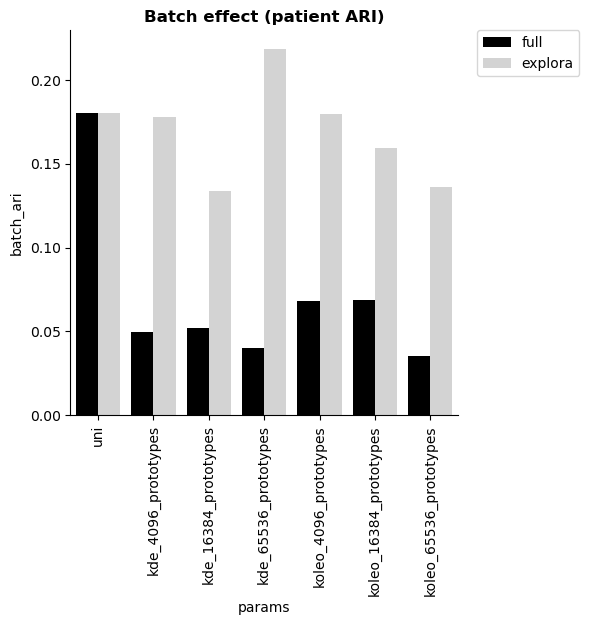

In [50]:
sns.barplot(data=df_batch, x="params", y="batch_ari", hue="model", palette={config['retrained_model_list2_type']: 'black', config['retrained_model_list1_type']: 'lightgray'})
sns.despine()
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Batch effect (patient ARI)", weight='bold')
plt.savefig(os.path.join(config["figures_folder"], "Figure3/batch_effect_full_vs_explora_models.pdf"), bbox_inches='tight')